Read file

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("csv_result-postoperative-patient-data.csv")

In [3]:
df.head(10)

,id,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,decision
0,1,mid,low,excellent,mid,stable,stable,stable,15,A
1,2,mid,high,excellent,high,stable,stable,stable,10,S
2,3,high,low,excellent,high,stable,stable,mod-stable,10,A
3,4,mid,low,good,high,stable,unstable,mod-stable,15,A
4,5,mid,mid,excellent,high,stable,stable,stable,10,A
5,6,high,low,good,mid,stable,stable,unstable,15,S
6,7,mid,low,excellent,high,stable,stable,mod-stable,05,S
7,8,high,mid,excellent,mid,unstable,unstable,stable,10,S
8,9,mid,high,good,mid,stable,stable,stable,10,S
9,10,mid,low,excellent,mid,unstable,stable,mod-stable,10,S


In [4]:
feature_names = list(df.columns[:-1])
feature_names

['id',
 'L-CORE',
 'L-SURF',
 'L-O2',
 'L-BP',
 'SURF-STBL',
 'CORE-STBL',
 'BP-STBL',
 'COMFORT']

In [5]:
class_names = df["decision"].unique()
class_names

array(['A', 'S', 'I'], dtype=object)

In [6]:
a_list = df.values.tolist()

In [7]:
a_list

[[1,
  'mid',
  'low',
  'excellent',
  'mid',
  'stable',
  'stable',
  'stable',
  '15',
  'A'],
 [2,
  'mid',
  'high',
  'excellent',
  'high',
  'stable',
  'stable',
  'stable',
  '10',
  'S'],
 [3,
  'high',
  'low',
  'excellent',
  'high',
  'stable',
  'stable',
  'mod-stable',
  '10',
  'A'],
 [4,
  'mid',
  'low',
  'good',
  'high',
  'stable',
  'unstable',
  'mod-stable',
  '15',
  'A'],
 [5,
  'mid',
  'mid',
  'excellent',
  'high',
  'stable',
  'stable',
  'stable',
  '10',
  'A'],
 [6, 'high', 'low', 'good', 'mid', 'stable', 'stable', 'unstable', '15', 'S'],
 [7,
  'mid',
  'low',
  'excellent',
  'high',
  'stable',
  'stable',
  'mod-stable',
  '05',
  'S'],
 [8,
  'high',
  'mid',
  'excellent',
  'mid',
  'unstable',
  'unstable',
  'stable',
  '10',
  'S'],
 [9, 'mid', 'high', 'good', 'mid', 'stable', 'stable', 'stable', '10', 'S'],
 [10,
  'mid',
  'low',
  'excellent',
  'mid',
  'unstable',
  'stable',
  'mod-stable',
  '10',
  'S'],
 [11, 'mid', 'mid', 'goo

Lebel Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()

In [10]:
C = list(map(list, zip(*a_list)))

In [11]:
C

[[1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90],
 ['mid',
  'mid',
  'high',
  'mid',
  'mid',
  'high',
  'mid',
  'high',
  'mid',
  'mid',
  'mid',
  'mid',
  'high',
  'mid',
  'mid',
  'high',
  'low',
  'mid',
  'mid',
  'mid',
  'low',
  'low',
  'mid',
  'mid',
  'high',
  'low',
  'high',
  'low',
  'mid',
  'mid',
  'mid',
  'low',
  'mid',
  'mid',
  'low',
  'mid',
  'low',
  'low',
  'low',
  'mid',
  'low',
  'low',
  'high',
  'mid',
  'low',
  'low',
  'low',
  'mid',
  'high',
  'mid',
  'mid',


In [12]:
string = []
for i in range(len(C)):
    if any(type(s) == str for s in C[i]):
        string.append(i)
string

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [13]:
len(C)

10

In [14]:
for i in string:
    le.fit(C[i])
    print(le.classes_)
    C[i] = list(le.transform(C[i]))

['high' 'low' 'mid']
['high' 'low' 'mid']
['excellent' 'good']
['high' 'low' 'mid']
['stable' 'unstable']
['mod-stable' 'stable' 'unstable']
['mod-stable' 'stable' 'unstable']
['05' '07' '10' '15' '?']
['A' 'I' 'S']


In [15]:
C = list(map(list, zip(*C)))

In [16]:
a_list_enc = C

In [17]:
a_list_enc

[[1, 2, 1, 0, 2, 0, 1, 1, 3, 0],
 [2, 2, 0, 0, 0, 0, 1, 1, 2, 2],
 [3, 0, 1, 0, 0, 0, 1, 0, 2, 0],
 [4, 2, 1, 1, 0, 0, 2, 0, 3, 0],
 [5, 2, 2, 0, 0, 0, 1, 1, 2, 0],
 [6, 0, 1, 1, 2, 0, 1, 2, 3, 2],
 [7, 2, 1, 0, 0, 0, 1, 0, 0, 2],
 [8, 0, 2, 0, 2, 1, 2, 1, 2, 2],
 [9, 2, 0, 1, 2, 0, 1, 1, 2, 2],
 [10, 2, 1, 0, 2, 1, 1, 0, 2, 2],
 [11, 2, 2, 1, 2, 0, 1, 1, 3, 0],
 [12, 2, 1, 1, 0, 0, 1, 0, 2, 0],
 [13, 0, 0, 0, 0, 1, 1, 2, 3, 0],
 [14, 2, 0, 1, 2, 1, 1, 0, 2, 0],
 [15, 2, 1, 1, 0, 1, 2, 1, 3, 2],
 [16, 0, 0, 0, 0, 1, 1, 2, 2, 0],
 [17, 1, 0, 1, 0, 1, 1, 0, 3, 0],
 [18, 2, 1, 1, 0, 1, 1, 1, 2, 0],
 [19, 2, 0, 1, 2, 1, 1, 2, 3, 0],
 [20, 2, 2, 1, 2, 0, 1, 1, 2, 0],
 [21, 1, 0, 1, 2, 1, 1, 1, 3, 0],
 [22, 1, 2, 0, 0, 1, 1, 2, 2, 2],
 [23, 2, 2, 1, 2, 1, 1, 2, 3, 0],
 [24, 2, 2, 1, 2, 1, 1, 1, 2, 0],
 [25, 0, 0, 1, 2, 0, 1, 0, 2, 0],
 [26, 1, 2, 1, 2, 1, 1, 1, 2, 0],
 [27, 0, 2, 1, 1, 0, 1, 0, 2, 0],
 [28, 1, 2, 0, 0, 0, 1, 0, 2, 0],
 [29, 2, 2, 0, 2, 0, 1, 2, 3, 0],
 [30, 2, 2, 1, 2, 1, 1,

In [18]:
df=pd.DataFrame(data=a_list_enc)
df.to_csv('a_list_enc.csv',index=False)

Normalize

In [19]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [20]:
df = pd.read_csv('a_list_enc.csv')
df

,0,1,2,3,4,5,6,7,8,9
0,1,2,1,0,2,0,1,1,3,0
1,2,2,0,0,0,0,1,1,2,2
2,3,0,1,0,0,0,1,0,2,0
3,4,2,1,1,0,0,2,0,3,0
4,5,2,2,0,0,0,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...
85,86,2,2,0,2,1,1,1,2,0
86,87,2,2,0,2,1,1,1,3,2
87,88,2,2,1,2,1,1,1,3,0
88,89,2,2,0,2,1,1,1,2,0


1)

In [21]:
min_max_scaler = MinMaxScaler(feature_range=(0,1))

In [22]:
data_scaled = min_max_scaler.fit_transform(np.float32(df.iloc[:,:-1]))

In [23]:
print(data_scaled)

[[0.         1.         0.5        0.         1.         0.
  0.5        0.5        0.75      ]
 [0.01123596 1.         0.         0.         0.         0.
  0.5        0.5        0.5       ]
 [0.02247191 0.         0.5        0.         0.         0.
  0.5        0.         0.5       ]
 [0.03370786 1.         0.5        1.         0.         0.
  1.         0.         0.75      ]
 [0.04494382 1.         1.         0.         0.         0.
  0.5        0.5        0.5       ]
 [0.05617977 0.         0.5        1.         1.         0.
  0.5        1.         0.75      ]
 [0.06741574 1.         0.5        0.         0.         0.
  0.5        0.         0.        ]
 [0.07865169 0.         1.         0.         1.         1.
  1.         0.5        0.5       ]
 [0.08988764 1.         0.         1.         1.         0.
  0.5        0.5        0.5       ]
 [0.1011236  1.         0.5        0.         1.         1.
  0.5        0.         0.5       ]
 [0.11235955 1.         1.         1.   

In [24]:
data_scaled.shape

(90, 9)

2)

In [25]:
scaler = StandardScaler()

In [26]:
scaler.fit(np.float32(df.iloc[:,:-1]))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [27]:
data_scaled_std = scaler.transform(df.iloc[:,:-1])

In [28]:
data_scaled_std

array([[-1.71291154,  0.68111491, -0.44335508, -1.04547753,  0.74761983,
        -1.        , -0.20327891, -0.03179815,  1.23743685],
       [-1.67441914,  0.68111491, -1.73051498, -1.04547753, -1.38843682,
        -1.        , -0.20327891, -0.03179815, -0.35355339],
       [-1.63592675, -2.04334474, -0.44335508, -1.04547753, -1.38843682,
        -1.        , -0.20327891, -1.46271484, -0.35355339],
       [-1.59743435,  0.68111491, -0.44335508,  0.95650072, -1.38843682,
        -1.        ,  3.45574144, -1.46271484,  1.23743685],
       [-1.55894196,  0.68111491,  0.84380482, -1.04547753, -1.38843682,
        -1.        , -0.20327891, -0.03179815, -0.35355339],
       [-1.52044957, -2.04334474, -0.44335508,  0.95650072,  0.74761983,
        -1.        , -0.20327891,  1.39911854,  1.23743685],
       [-1.48195717,  0.68111491, -0.44335508, -1.04547753, -1.38843682,
        -1.        , -0.20327891, -1.46271484, -3.53553387],
       [-1.44346478, -2.04334474,  0.84380482, -1.04547753,  0

In [29]:
label = df.iloc[:,9].to_frame()

In [30]:
a_list_enc_norm = np.concatenate([data_scaled_std, label], axis=1)

In [31]:
a_list_enc_norm = pd.DataFrame(data=a_list_enc_norm)

In [32]:
a_list_enc_norm.to_csv('a_list_enc_norm.csv',index=False)

Divide train test

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
df = pd.read_csv('a_list_enc_norm.csv')

In [35]:
df

,0,1,2,3,4,5,6,7,8,9
0,-1.712912,0.681115,-0.443355,-1.045478,0.747620,-1.0,-0.203279,-0.031798,1.237437,0.0
1,-1.674419,0.681115,-1.730515,-1.045478,-1.388437,-1.0,-0.203279,-0.031798,-0.353553,2.0
2,-1.635927,-2.043345,-0.443355,-1.045478,-1.388437,-1.0,-0.203279,-1.462715,-0.353553,0.0
3,-1.597434,0.681115,-0.443355,0.956501,-1.388437,-1.0,3.455741,-1.462715,1.237437,0.0
4,-1.558942,0.681115,0.843805,-1.045478,-1.388437,-1.0,-0.203279,-0.031798,-0.353553,0.0
...,...,...,...,...,...,...,...,...,...,...
85,1.558942,0.681115,0.843805,-1.045478,0.747620,1.0,-0.203279,-0.031798,-0.353553,0.0
86,1.597434,0.681115,0.843805,-1.045478,0.747620,1.0,-0.203279,-0.031798,1.237437,2.0
87,1.635927,0.681115,0.843805,0.956501,0.747620,1.0,-0.203279,-0.031798,1.237437,0.0
88,1.674419,0.681115,0.843805,-1.045478,0.747620,1.0,-0.203279,-0.031798,-0.353553,0.0


In [36]:
X_data = np.array(df.iloc[:,:9])

In [37]:
Y_data = df.iloc[:,-1].to_numpy()

In [38]:
Y_data

array([0., 2., 0., 0., 0., 2., 2., 2., 2., 2., 0., 0., 0., 0., 2., 0., 0.,
       0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0.,
       0., 0., 2., 2., 2., 0., 0., 2., 2., 2., 0., 2., 1., 0., 0., 0., 0.,
       0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 2., 0., 0.,
       0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 2., 0., 0., 2., 1., 0., 0.,
       0., 2., 0., 0., 2.])

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.33, random_state = 42)

In [40]:
print(X_train,"\n", Y_train)

[[-1.36647999  0.68111491 -0.44335508 -1.04547753  0.74761983  1.
  -0.20327891 -1.46271484 -0.35355339]
 [ 0.90457126  0.68111491  0.84380482 -1.04547753 -1.38843682 -1.
  -0.20327891 -0.03179815 -0.35355339]
 [-1.52044957 -2.04334474 -0.44335508  0.95650072  0.74761983 -1.
  -0.20327891  1.39911854  1.23743685]
 [-0.09623099 -2.04334474 -1.73051498  0.95650072 -1.38843682  1.
  -0.20327891 -0.03179815  1.23743685]
 [ 0.09623099  0.68111491  0.84380482 -1.04547753  0.74761983  1.
  -0.20327891 -0.03179815 -0.35355339]
 [-1.09703323 -0.68111491 -1.73051498  0.95650072 -1.38843682  1.
  -0.20327891 -1.46271484  1.23743685]
 [ 0.0192462  -0.68111491  0.84380482  0.95650072  0.74761983  1.
  -0.20327891 -0.03179815 -0.35355339]
 [-0.40417014 -0.68111491  0.84380482 -1.04547753 -1.38843682 -1.
  -0.20327891 -1.46271484 -0.35355339]
 [-1.44346478 -2.04334474  0.84380482 -1.04547753  0.74761983  1.
   3.45574144 -0.03179815 -0.35355339]
 [ 1.2894952   0.68111491  0.84380482 -1.04547753  0.74

In [41]:
type(Y_train)

numpy.ndarray

Running Neural Network

1)

In [42]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [43]:
clf = MLPClassifier(hidden_layer_sizes = (20,))

In [44]:
clf.fit(X_train, Y_train)

C:\Users\janek\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [45]:
predictions = clf.predict(X_test)
predictions

array([0., 2., 2., 0., 2., 0., 0., 0., 2., 0., 0., 2., 0., 0., 0., 0., 0.,
       2., 0., 2., 0., 0., 0., 0., 2., 0., 0., 0., 2., 0.])

In [46]:
Y_test

array([0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 2., 0., 0., 2., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [47]:
print(accuracy_score(Y_test, predictions))

0.6


In [48]:
print(confusion_matrix(Y_test, predictions))

[[18  9]
 [ 3  0]]


In [49]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.86      0.67      0.75        27
         2.0       0.00      0.00      0.00         3

    accuracy                           0.60        30
   macro avg       0.43      0.33      0.38        30
weighted avg       0.77      0.60      0.68        30



a.

In [50]:
clf_a1 = MLPClassifier(hidden_layer_sizes = (15,))
clf_a1.fit(X_train,Y_train)
predictions_a1 = clf_a1.predict(X_test)
predictions_a1

C:\Users\janek\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([0., 2., 2., 2., 2., 0., 0., 0., 2., 0., 0., 2., 2., 0., 0., 0., 2.,
       2., 0., 2., 0., 0., 2., 0., 2., 0., 0., 0., 2., 2.])

In [51]:
clf_a2 = MLPClassifier(hidden_layer_sizes = (35,))
clf_a2.fit(X_train,Y_train)
predictions_a2 = clf_a2.predict(X_test)
predictions_a2

C:\Users\janek\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([0., 2., 2., 2., 2., 0., 0., 0., 2., 2., 0., 2., 0., 0., 0., 2., 0.,
       2., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 2., 2.])

In [52]:
clf_a3 = MLPClassifier(hidden_layer_sizes = (55,))
clf_a3.fit(X_train,Y_train)
predictions_a3 = clf_a3.predict(X_test)
predictions_a3

C:\Users\janek\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([0., 2., 2., 0., 2., 0., 0., 0., 2., 2., 0., 2., 2., 0., 2., 2., 0.,
       2., 0., 2., 0., 0., 2., 0., 2., 0., 0., 0., 2., 2.])

In [53]:
accuracy_a1 = accuracy_score(Y_test, predictions_a1)
accuracy_a2 = accuracy_score(Y_test, predictions_a2)
accuracy_a3 = accuracy_score(Y_test, predictions_a3)
acc_a = [accuracy_a1,accuracy_a2,accuracy_a3]

In [54]:
acc_a

[0.43333333333333335, 0.5, 0.4]

b.

In [55]:
clf_b1 = MLPClassifier(hidden_layer_sizes=(15,15))
clf_b1.fit(X_train, Y_train)
predictions_b1 = clf_b1.predict(X_test)
accuracy_b1 = accuracy_score(Y_test, predictions_b1)

C:\Users\janek\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [56]:
clf_b2 = MLPClassifier(hidden_layer_sizes=(35,35))
clf_b2.fit(X_train, Y_train)
predictions_b2 = clf_b2.predict(X_test)
accuracy_b2 = accuracy_score(Y_test, predictions_b2)

C:\Users\janek\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [57]:
clf_b3 = MLPClassifier(hidden_layer_sizes=(55,55))
clf_b3.fit(X_train, Y_train)
predictions_b3 = clf_b3.predict(X_test)
accuracy_b3 = accuracy_score(Y_test, predictions_b3)

C:\Users\janek\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [58]:
acc_b = [accuracy_b1,accuracy_b2,accuracy_b3]

In [59]:
acc_b

[0.6333333333333333, 0.43333333333333335, 0.4666666666666667]

2)

In [60]:
from matplotlib import pyplot as plt

In [61]:
x_axis = [15,35,55]

([<matplotlib.axis.XTick at 0x249f61e4248>,
 <a list of 3 Text xticklabel objects>)

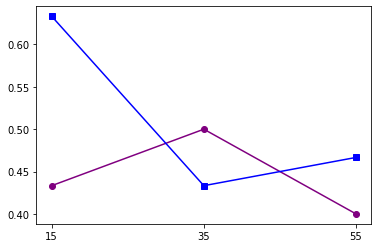

In [62]:
plt.plot(x_axis, acc_a, color = "purple", marker = "o")
plt.plot(x_axis, acc_b, color = "blue", marker = "s")
plt.xticks([15,35,55])

3)

In [63]:
clf_a1_i = MLPClassifier(hidden_layer_sizes = (15,), activation = 'identity')
clf_a1_i.fit(X_train,Y_train)
predictions_a1_i = clf_a1_i.predict(X_test)
predictions_a1_i

C:\Users\janek\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([0., 2., 2., 0., 2., 0., 0., 0., 2., 0., 0., 2., 0., 0., 0., 2., 2.,
       2., 0., 2., 0., 0., 0., 0., 2., 0., 0., 0., 2., 2.])

In [64]:
clf_a1_l = MLPClassifier(hidden_layer_sizes = (15,), activation = 'logistic')
clf_a1_l.fit(X_train,Y_train)
predictions_a1_l = clf_a1_l.predict(X_test)
predictions_a1_l

C:\Users\janek\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([0., 2., 0., 0., 0., 0., 0., 0., 2., 0., 0., 2., 0., 0., 0., 0., 0.,
       0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [65]:
clf_a1_t = MLPClassifier(hidden_layer_sizes = (15,), activation = 'tanh')
clf_a1_t.fit(X_train,Y_train)
predictions_a1_t = clf_a1_t.predict(X_test)
predictions_a1_t

C:\Users\janek\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([0., 2., 0., 1., 0., 2., 0., 0., 2., 0., 0., 2., 0., 0., 0., 0., 0.,
       2., 0., 2., 0., 0., 0., 0., 2., 0., 0., 0., 0., 2.])

In [66]:
accuracy_a1_i = accuracy_score(Y_test, predictions_a1_i)
accuracy_a1_l = accuracy_score(Y_test, predictions_a1_l)
accuracy_a1_t  = accuracy_score(Y_test, predictions_a1_t)
activation_acc = [accuracy_a1, accuracy_a1_i, accuracy_a1_l, accuracy_a1_t]

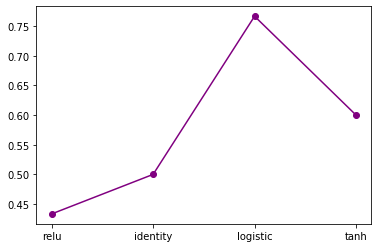

In [67]:
x_axis = ['relu','identity','logistic','tanh']
plt.plot(x_axis, activation_acc, color = "purple", marker = "o")

4)

In [68]:
clf_a1_0 = MLPClassifier(hidden_layer_sizes = (15,), momentum = 0)
clf_a1_0.fit(X_train,Y_train)
predictions_a1_0 = clf_a1_0.predict(X_test)
predictions_a1_0

C:\Users\janek\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([0., 2., 2., 2., 2., 0., 0., 0., 2., 0., 0., 2., 2., 0., 0., 2., 0.,
       2., 0., 2., 0., 0., 0., 0., 2., 0., 0., 0., 0., 2.])

In [69]:
clf_a1_2 = MLPClassifier(hidden_layer_sizes = (15,), momentum = 0.2)
clf_a1_2.fit(X_train,Y_train)
predictions_a1_2 = clf_a1_2.predict(X_test)
predictions_a1_2

C:\Users\janek\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([0., 2., 2., 0., 2., 0., 0., 0., 2., 0., 0., 2., 2., 0., 0., 0., 2.,
       2., 0., 2., 0., 0., 0., 0., 2., 0., 0., 0., 2., 2.])

In [70]:
clf_a1_4 = MLPClassifier(hidden_layer_sizes = (15,), momentum = 0.4)
clf_a1_4.fit(X_train,Y_train)
predictions_a1_4 = clf_a1_4.predict(X_test)
predictions_a1_4

C:\Users\janek\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([2., 2., 2., 2., 2., 2., 0., 0., 2., 2., 0., 2., 0., 0., 0., 0., 2.,
       2., 0., 2., 0., 0., 0., 0., 2., 0., 0., 0., 2., 2.])

In [71]:
clf_a1_6 = MLPClassifier(hidden_layer_sizes = (15,), momentum = 0.6)
clf_a1_6.fit(X_train,Y_train)
predictions_a1_6 = clf_a1_6.predict(X_test)
predictions_a1_6

C:\Users\janek\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([0., 2., 0., 0., 0., 2., 0., 0., 0., 0., 0., 2., 0., 0., 2., 0., 0.,
       0., 0., 2., 0., 0., 0., 0., 2., 0., 0., 0., 2., 2.])

In [72]:
clf_a1_8 = MLPClassifier(hidden_layer_sizes = (15,), momentum = 0.8)
clf_a1_8.fit(X_train,Y_train)
predictions_a1_8 = clf_a1_8.predict(X_test)
predictions_a1_8

C:\Users\janek\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([0., 2., 2., 1., 2., 0., 0., 0., 2., 0., 0., 2., 0., 0., 0., 2., 0.,
       2., 0., 2., 0., 0., 0., 0., 2., 0., 0., 0., 2., 2.])

In [73]:
accuracy_a1_0 = accuracy_score(Y_test, predictions_a1_0)
accuracy_a1_2 = accuracy_score(Y_test, predictions_a1_2)
accuracy_a1_4  = accuracy_score(Y_test, predictions_a1_4)
accuracy_a1_6  = accuracy_score(Y_test, predictions_a1_6)
accuracy_a1_8  = accuracy_score(Y_test, predictions_a1_8)

momentum_acc = [accuracy_a1_0, accuracy_a1_2, accuracy_a1_2, accuracy_a1_6, accuracy_a1_8]

([<matplotlib.axis.XTick at 0x249f6235508>,
 <a list of 5 Text xticklabel objects>)

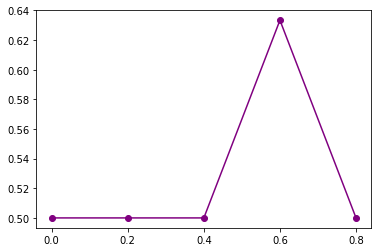

In [74]:
x_axis = [0,0.2,0.4,0.6,0.8]
plt.plot(x_axis, momentum_acc, color = "purple", marker = "o")
plt.xticks(x_axis)

5)

In [75]:
clf_a1_in = MLPClassifier(hidden_layer_sizes = (15,), learning_rate = 'invscaling')
clf_a1_in.fit(X_train,Y_train)
predictions_a1_in = clf_a1_in.predict(X_test)
predictions_a1_in

clf_a1_a = MLPClassifier(hidden_layer_sizes = (15,), learning_rate = 'adaptive')
clf_a1_a.fit(X_train,Y_train)
predictions_a1_a = clf_a1_a.predict(X_test)
predictions_a1_a

clf_a1_c = MLPClassifier(hidden_layer_sizes = (15,), learning_rate_init = 0.01)
clf_a1_c.fit(X_train,Y_train)
predictions_a1_c = clf_a1_c.predict(X_test)
predictions_a1_c


C:\Users\janek\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\janek\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\janek\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([0., 2., 2., 2., 2., 0., 0., 0., 0., 2., 0., 2., 1., 0., 0., 0., 2.,
       2., 0., 2., 0., 0., 2., 0., 2., 0., 0., 0., 2., 2.])

In [76]:
accuracy_a1_in = accuracy_score(Y_test, predictions_a1_in)
accuracy_a1_a  = accuracy_score(Y_test, predictions_a1_a)
accuracy_a1_c  = accuracy_score(Y_test, predictions_a1_c)

rate_acc = [accuracy_a1, accuracy_a1_c, accuracy_a1_in, accuracy_a1_a]

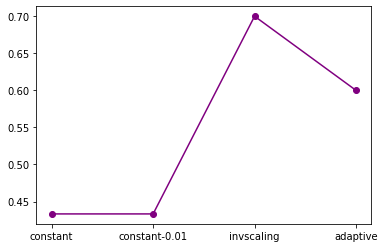

In [77]:
x_axis = ['constant','constant-0.01','invscaling','adaptive']
plt.plot(x_axis, rate_acc, color = "purple", marker = "o")

Discretization

In [78]:
a_list_enc = pd.read_csv("a_list_enc.csv").values.tolist()

In [79]:
from sklearn.preprocessing import KBinsDiscretizer
disc = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
a_list_enc_disc = disc.fit_transform(a_list_enc)

In [80]:
df = pd.DataFrame(a_list_enc_disc)
df.to_csv("a_list_enc_disc", index = False)

In [81]:
X_data = np.array(df.iloc[:,:9])
Y_data = df.iloc[:,-1].to_numpy()
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.33, random_state = 42)

In [82]:
Y_train

array([2., 0., 2., 2., 0., 0., 2., 0., 2., 2., 0., 0., 0., 0., 2., 0., 0.,
       0., 0., 2., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 1., 0., 0., 0.,
       2., 2., 0., 0., 0., 0., 0., 0., 0., 2., 0., 2., 2., 2., 0., 2., 0.,
       0., 0., 0., 1., 0., 0., 0., 2., 0.])

Running Decision Tree

1)

In [83]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)
predictions = clf.predict(X_test)
predictions

array([2., 2., 2., 2., 2., 0., 0., 0., 0., 2., 0., 2., 1., 0., 0., 2., 0.,
       2., 0., 1., 0., 0., 2., 0., 2., 0., 2., 0., 2., 1.])

In [85]:
print(accuracy_score(Y_test, predictions)) 
print(confusion_matrix(Y_test, predictions)) 
print(classification_report(Y_test, predictions))

0.36666666666666664
[[11  3 13]
 [ 0  0  0]
 [ 3  0  0]]
              precision    recall  f1-score   support

         0.0       0.79      0.41      0.54        27
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         3

    accuracy                           0.37        30
   macro avg       0.26      0.14      0.18        30
weighted avg       0.71      0.37      0.48        30



C:\Users\janek\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
clf_entropy = DecisionTreeClassifier(criterion = 'entropy')
clf_entropy.fit(X_train, Y_train)
predictions = clf_entropy.predict(X_test)
predictions

array([2., 2., 2., 2., 2., 2., 2., 0., 0., 2., 0., 2., 2., 0., 0., 2., 2.,
       2., 0., 1., 0., 0., 2., 1., 2., 0., 0., 0., 2., 1.])

In [87]:
print(accuracy_score(Y_test, predictions)) 
print(confusion_matrix(Y_test, predictions)) 
print(classification_report(Y_test, predictions))

0.26666666666666666
[[ 8  3 16]
 [ 0  0  0]
 [ 3  0  0]]
              precision    recall  f1-score   support

         0.0       0.73      0.30      0.42        27
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         3

    accuracy                           0.27        30
   macro avg       0.24      0.10      0.14        30
weighted avg       0.65      0.27      0.38        30



C:\Users\janek\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2)

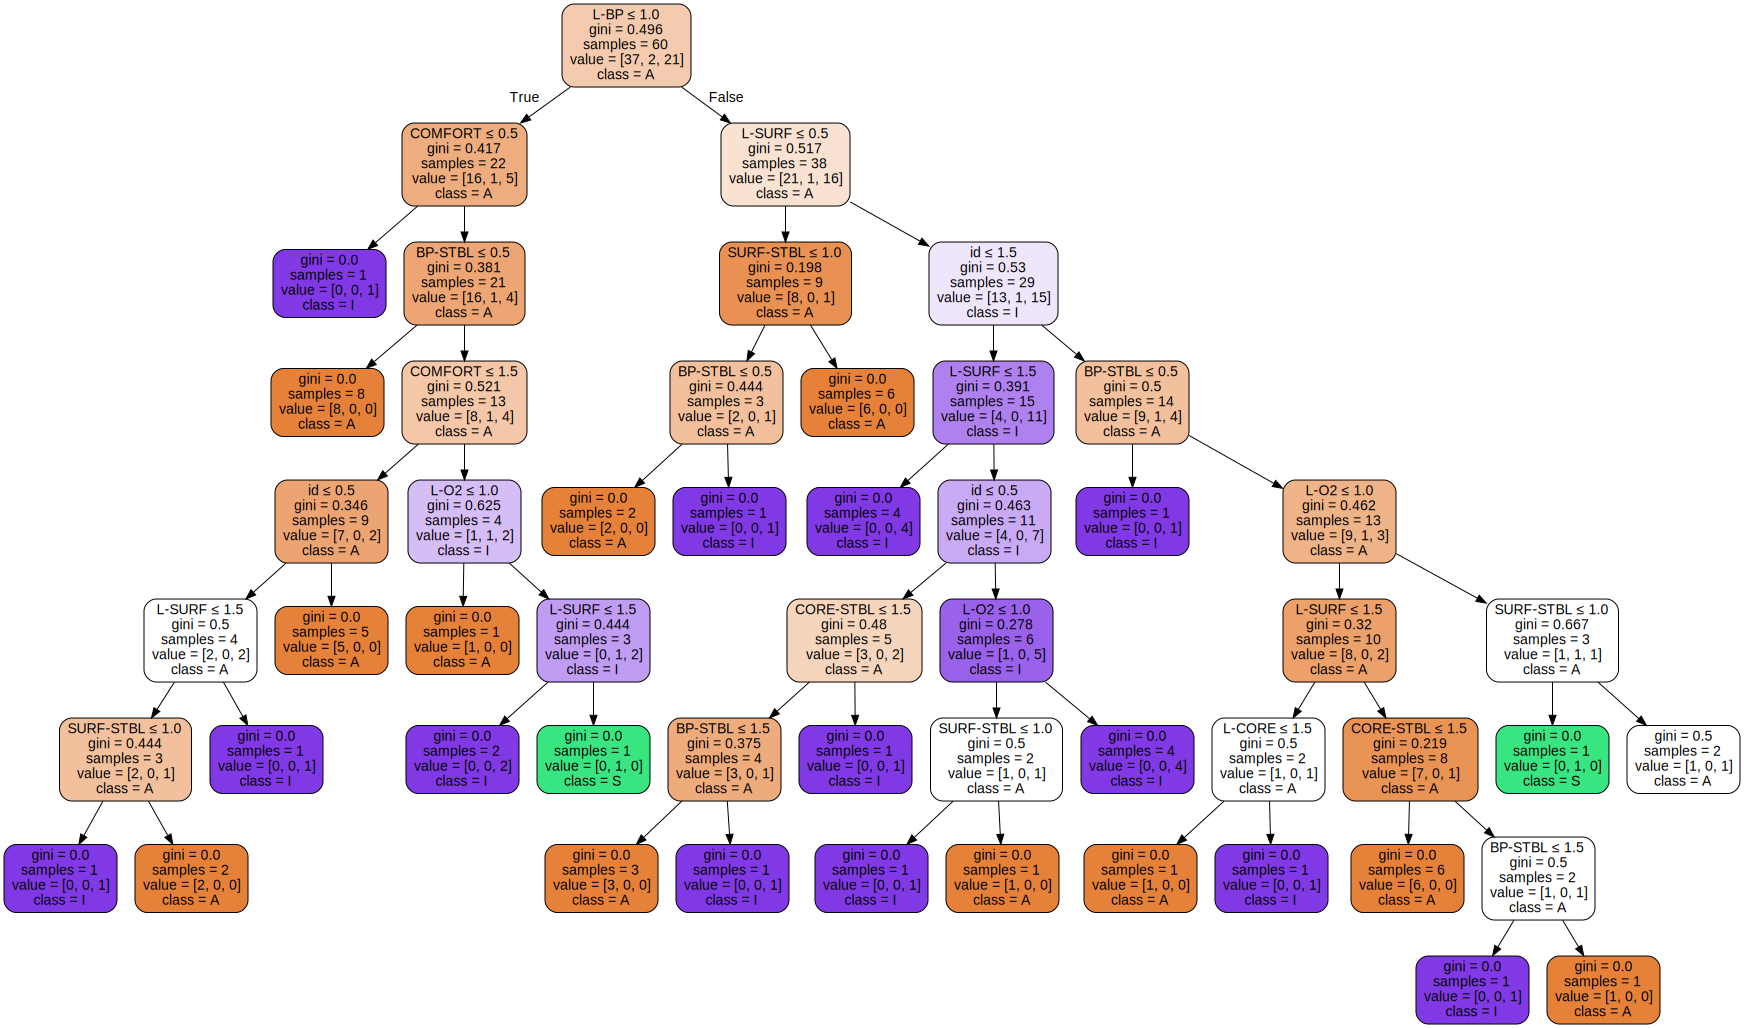

In [88]:
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render() 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=feature_names,  
                         class_names=class_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

3)

In [89]:
clf_depth = DecisionTreeClassifier(max_depth = 5)
clf_depth.fit(X_train, Y_train)
predictions = clf_depth.predict(X_test)
predictions

array([2., 0., 2., 0., 2., 0., 0., 0., 0., 2., 0., 2., 0., 0., 2., 0., 0.,
       0., 0., 0., 0., 0., 2., 0., 2., 0., 0., 0., 2., 0.])

In [90]:
print(accuracy_score(Y_test, predictions)) 
print(confusion_matrix(Y_test, predictions)) 
print(classification_report(Y_test, predictions))

0.6
[[18  9]
 [ 3  0]]
              precision    recall  f1-score   support

         0.0       0.86      0.67      0.75        27
         2.0       0.00      0.00      0.00         3

    accuracy                           0.60        30
   macro avg       0.43      0.33      0.38        30
weighted avg       0.77      0.60      0.68        30



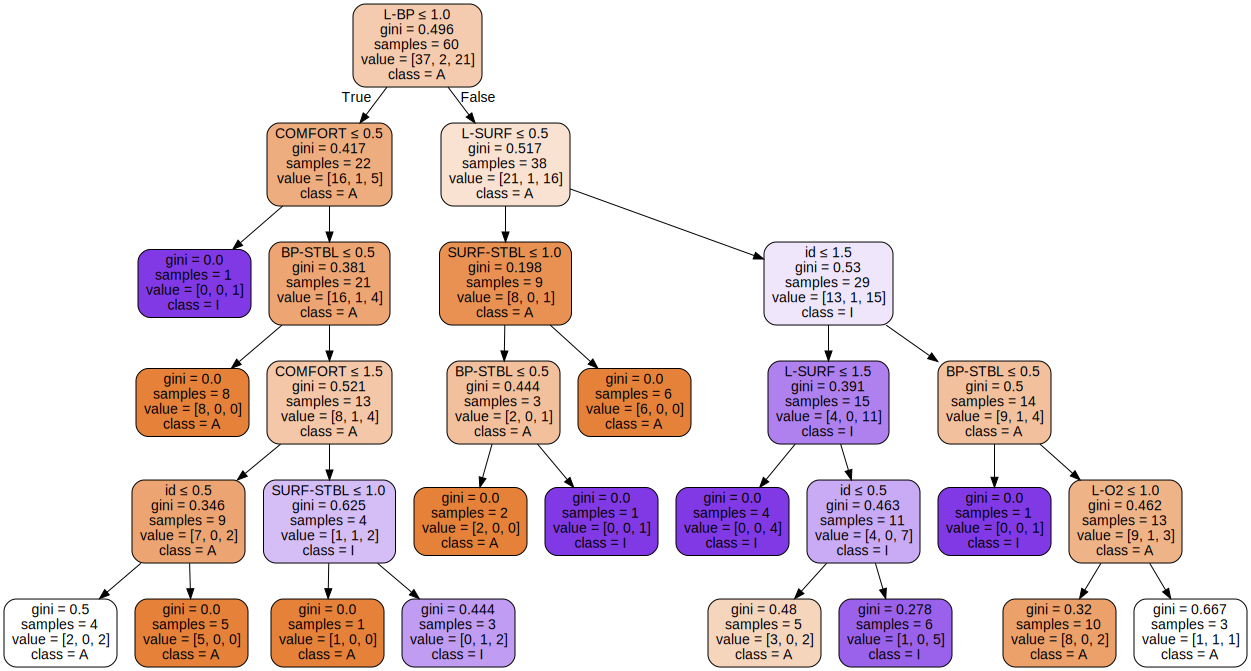

In [91]:
dot_data = tree.export_graphviz(clf_depth, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render() 
dot_data = tree.export_graphviz(clf_depth, out_file=None, 
                         feature_names=feature_names,  
                         class_names=class_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 